In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
import collections
from campaign_analysis import *


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


## Set-Up Code

In [10]:
start = '2014-12-01 00:00'
stop = '2015-01-02 00:00'

dsk_lg = '.*lg.* C14_en5C_dec_dsk_FR'
dsk_sm = '.*tp.* C14_en5C_dec_dsk_FR'

mob_lg = '.*lg.* C14_en5C_dec_mob_FR'
mob_sm = '.*tp.* C14_en5C_dec_mob_FR'

ipd_lg = '.*lg.* C14_en5C_dec_ipd_FR'
ipd_sm = '.*tp.* C14_en5C_dec_ipd_FR'

In [4]:
# fetch data
click = get_clicks(start, stop)
don = get_donations(start, stop)
imp = get_impressions(start, stop)

In [11]:
# set up regular expressions for grouping data
dsk = '|'.join([dsk_lg, dsk_sm]) 
mob = '|'.join([mob_lg, mob_sm])
ipd = '|'.join([ipd_lg, ipd_sm])
lg = '|'.join([dsk_lg, mob_lg, ipd_lg]) 
sm = '|'.join([dsk_sm, mob_sm, ipd_sm]) 


all_regs = collections.OrderedDict()
all_regs['Desktop Large'] = dsk_lg
all_regs['Desktop Small'] = dsk_sm
all_regs['Mobile Large'] = mob_lg
all_regs['Mobile Small'] = mob_sm
all_regs['Ipad Large'] = ipd_lg
all_regs['Ipad Samll'] = ipd_sm


device_regs = collections.OrderedDict()
device_regs['Ipad'] = ipd
device_regs['Mobile'] = mob
device_regs['Desktop'] = dsk

size_regs = collections.OrderedDict()
size_regs['Large'] = lg
size_regs['Small'] = sm

dsk_regs = collections.OrderedDict()
dsk_regs['Large Desk'] = dsk_lg
dsk_regs['Top Desk'] = dsk_sm

mob_regs = collections.OrderedDict()
mob_regs['Large Mob'] = mob_lg
mob_regs['Small Mob'] = mob_sm

ipd_regs = collections.OrderedDict()
ipd_regs['Large Ipad'] = ipd_lg
ipd_regs['Small Ipad'] = ipd_sm

lg_regs = collections.OrderedDict()
lg_regs['Large Desk'] = dsk_lg
lg_regs['Large Mobile'] = mob_lg
lg_regs['Large Ipad'] = ipd_lg


sm_regs = collections.OrderedDict()
sm_regs['Large Desk'] = dsk_sm
sm_regs['Large Mobile'] = mob_sm
sm_regs['Large Ipad'] = ipd_sm


##Impressions: Large vs Small By Device  

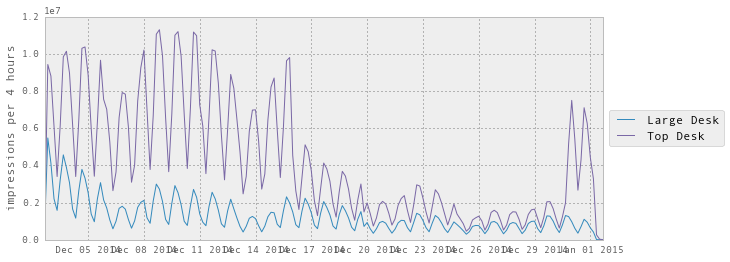

In [25]:
hours = 4
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}

plot_by_time(imp, dsk_regs, **config )


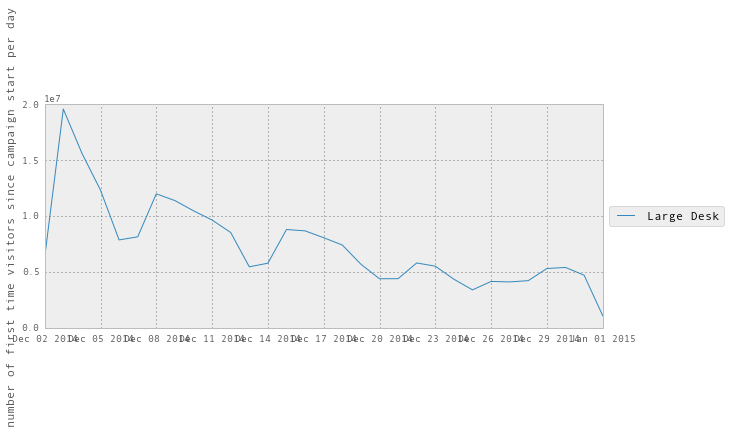

In [26]:
config = {
            'hours' :24, 
            'start': '2014-12-1 00',
            'ylabel': 'number of first time visitors since campaign start per day'
}

plot_by_time(imp, {'Large Desk': dsk_regs['Large Desk']}, **config )

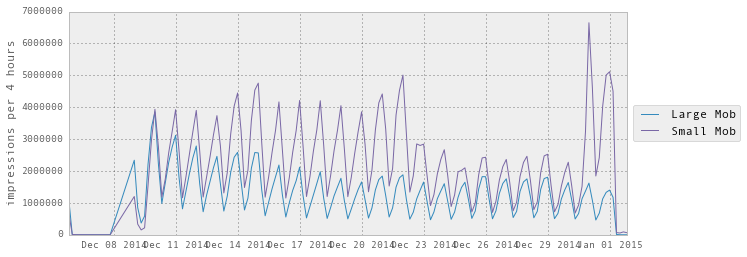

In [27]:
hours = 4
config = {
            'hours' :hours, 
            'start': '2014-12-1 00',
            'ylabel': 'impressions per %d hours' % hours

}
plot_by_time(imp, mob_regs, **config )


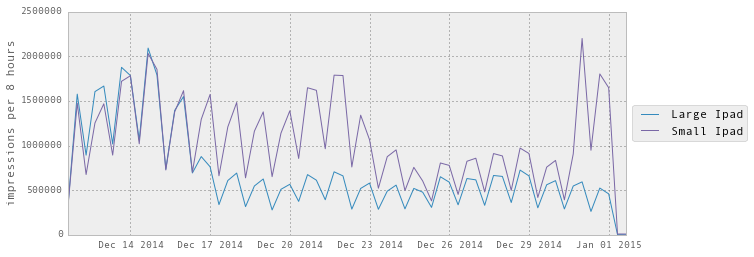

In [28]:

hours = 8
config = {
            'hours' :hours, 
            'ylabel': 'impressions per %d hours' % hours
}
plot_by_time(imp, ipd_regs, **config )

##Donations: Large vs Small By Device 

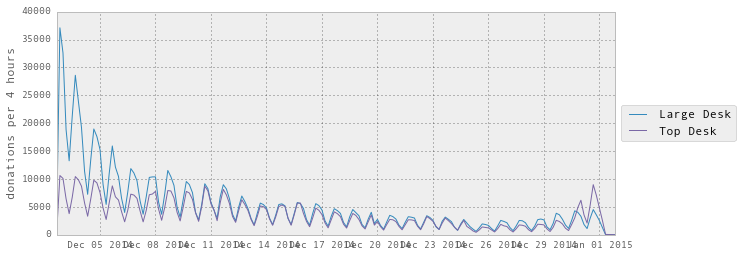

In [29]:
hours = 4
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' % hours
}

plot_by_time(don, dsk_regs, **config)


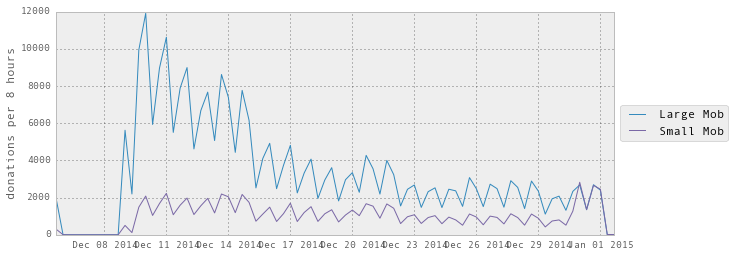

In [30]:
hours = 8
config = {
            'hours' :hours, 
            'ylabel': 'donations per %d hours' %hours
}
plot_by_time(don, mob_regs, **config )


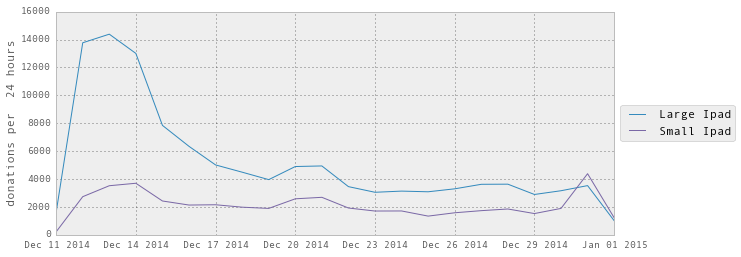

In [31]:
hours = 24
config = {
            'hours' :hours, 
            'start': '2014-12-8 00',
            'ylabel': 'donations per  %d hours' % hours
}
plot_by_time(don, ipd_regs, **config )



On the Ipad, the top screen banners quickly lead to fewer donations than the large screen  banners.

#Donation Rate: Large vs Small By Device

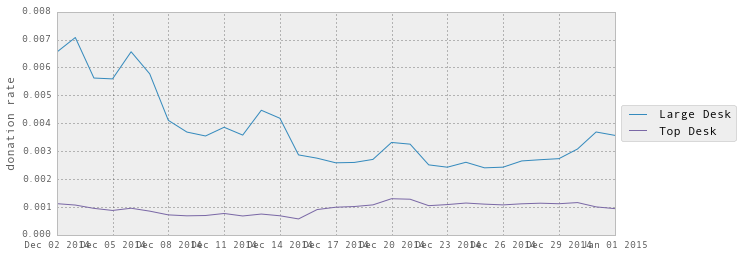

In [32]:
plot_rate_by_time(don, imp, dsk_regs, hours = 24)

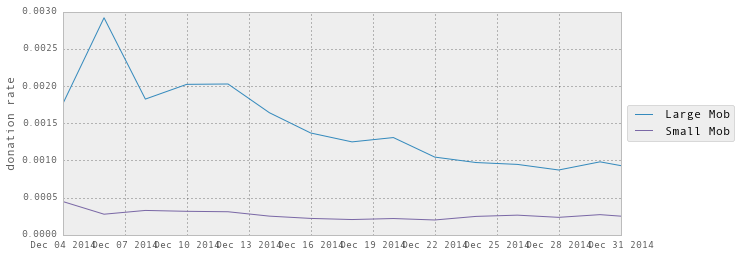

In [33]:
plot_rate_by_time(don, imp, mob_regs, hours = 48 )

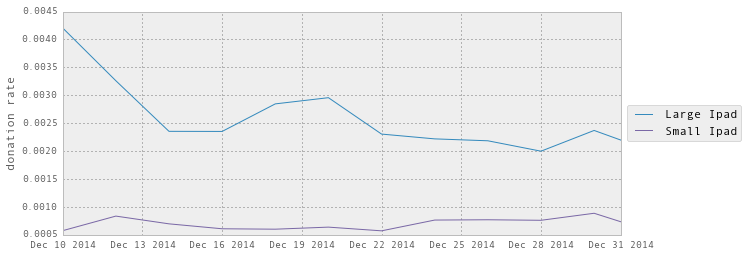

In [34]:
plot_rate_by_time(don, imp, ipd_regs, hours = 48 )

## Large Banner Donation Rate By Device

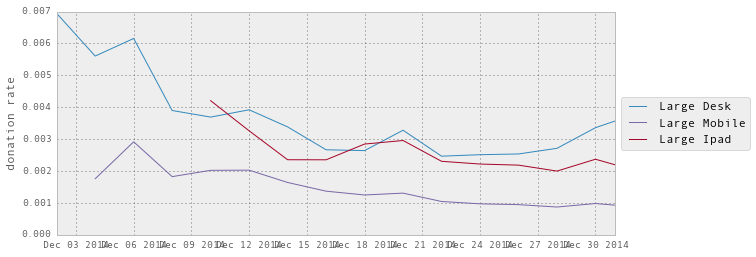

In [35]:
plot_rate_by_time(don, imp, lg_regs, hours = 48 )

## Small Banner Donation Rate By Device

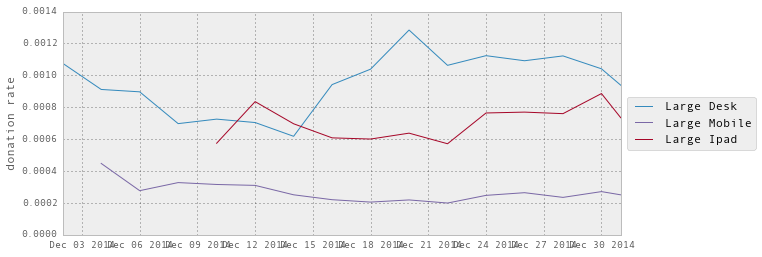

In [36]:
plot_rate_by_time(don, imp, sm_regs, hours = 48 )

## Amount/Day by Banner Size

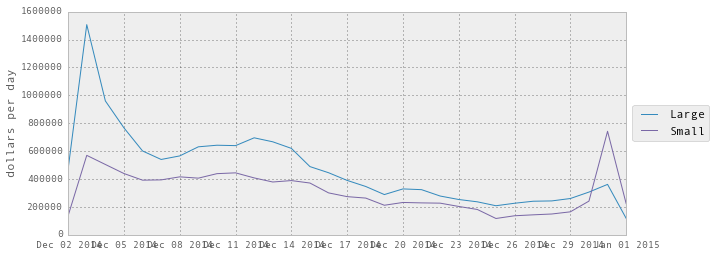

In [37]:
config = {
        'hours' : 24, 
        'amount' : True,
        'ylabel' : 'dollars per day'
}

fig = plot_by_time(don, size_regs, **config )

## Amount/Day by Device

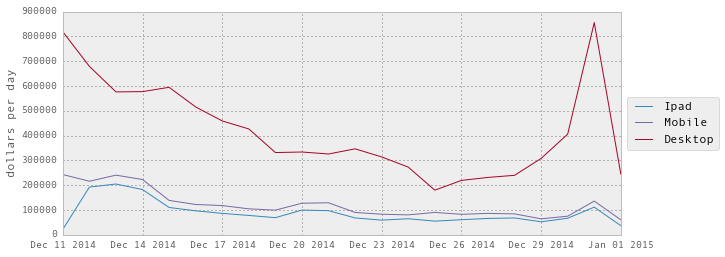

In [38]:
config = {
        'hours' : 24, 
        'amount' : True,
        'start' : '2014-12-3 00',
        'ylabel' : 'dollars per day'
}


fig = plot_by_time(don, device_regs, **config )

## Cumulative Total per Day By Device

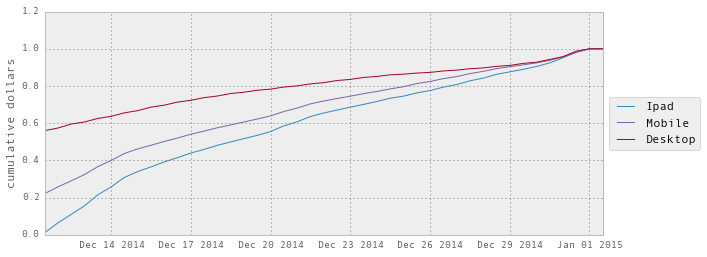

In [39]:
config = {
    'hours': 12,
    'amount': True,
    'cum' : True,
    'ylabel' : 'cumulative dollars',
    'interactive': False,
    'normalize' : True
}

plot_by_time(don, device_regs , **config)


##Quick view of Donation Amount Totals

In [41]:
def get_dollar_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['amount']
        d_totals[name] = [counts.sum()]
    return d_totals

In [42]:
get_dollar_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,10945315.09,8238129.52,2317267.4,832586.64,1386198.69,654557.91


In [43]:
get_dollar_break_downs(size_regs)

,Large,Small
0,14648781.18,9725274.07


In [44]:
get_dollar_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,1948112.64,3149854.04,19183444.61


## Quick View of Donation Number totals

In [6]:
def get_donation_number_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = don.ix[don.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = [counts.sum()]
    return d_totals


In [12]:
get_donation_number_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,944227,654630,270871,84893,114081,46859


In [13]:
get_donation_number_break_downs(size_regs)

,Large,Small
0,1329179,786382


In [14]:
get_donation_number_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,154070,355764,1598857


## Quick View of Impression Number Totals

In [49]:
def get_impression_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = imp.ix[imp.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = [counts.sum()]
    return d_totals

In [50]:
get_impression_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,228449800,759376400,191526500,338301300,44315600,66218500


In [51]:
get_impression_break_downs(size_regs)

,Large,Small
0,464291900,1163896200


In [52]:
get_impression_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,101849200,529827800,987826200


##Quick View of Click Total

In [56]:
click['name'] = click['name'].apply(lambda x: x.decode('utf-8'))

In [57]:
def get_click_break_downs(regs):
    d_totals = pd.DataFrame()
    for name, reg in regs.items():
        counts = click.ix[click.name.str.match(reg).apply(bool)]['n']
        d_totals[name] = [counts.sum()]
    return d_totals

In [58]:
get_click_break_downs(all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
0,1515967,1045349,542886,167044,210794,81560


In [59]:
get_click_break_downs(size_regs)

,Large,Small
0,2269647,1293953


In [60]:
get_click_break_downs(device_regs)

,Ipad,Mobile,Desktop
0,280104,709930,2561316


In [40]:
click.head()

,country,n,name
timestamp,,,
2014-12-01,FR,1,b'B14_1015_frFR_dsk_full_tr C14_frFR_dsk_FR'
2014-12-01,US,34,b'Waystogive C11_Waystogive'
2014-12-01,US,1803,b'B14_120100_5c_tp_enUS C14_enUS_dsk_FR'
2014-12-01,US,4052,b'B14_120100_5c_hf_enUS C14_enUS_dsk_FR'
2014-12-01,US,1,b'B14_1130_fl_tp_enUS C14_enUS_dsk_FR'


In [55]:
don.head()

,amount,country,n,name
timestamp,,,,
2014-12-01,74.97,NL,11,B14_1110_mlWW_dsk_lw_sym_lit C14_mlWW_dsk_lw_FR
2014-12-01,173.00,US,17,Waystogive C11_Waystogive
2014-12-01,15553.10,US,1243,B14_120100_5c_tp_enUS C14_enUS_dsk_FR
2014-12-01,36303.58,US,2775,B14_120100_5c_hf_enUS C14_enUS_dsk_FR
2014-12-01,3.00,US,1,B14_1130_fl_tp_enUS C14_enUS_dsk_FR
